In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
train_df = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

# Overivew of the Data

## What the data means
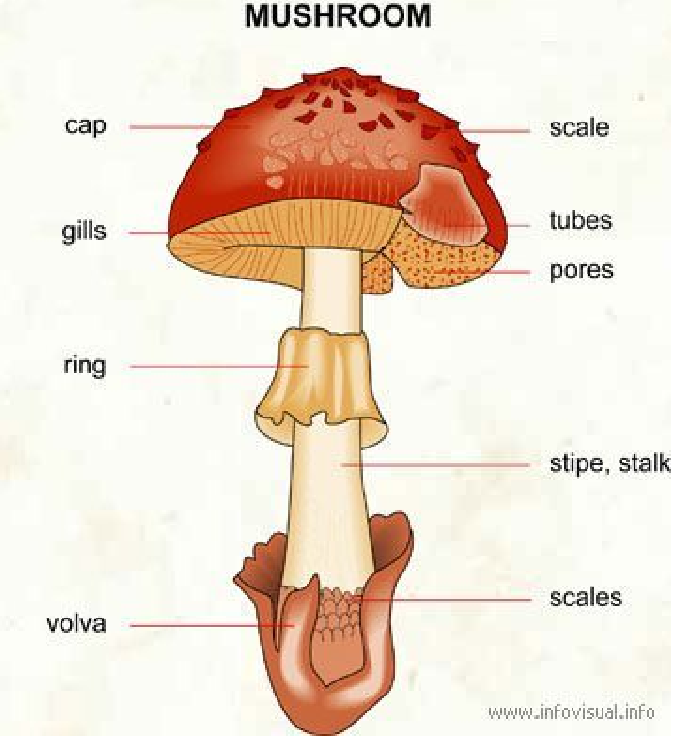

In [3]:
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


## What features do we have?

In [4]:
features = train_df.columns.values.tolist()
print("The features we have are:")
print(features)
print('='*60)
print('Number of features', train_df.shape[1])
print('Number of training instances:', train_df.shape[0])

The features we have are:
['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Number of features 22
Number of training instances: 3116945


## Classifying Feature Types

In [5]:
train_df.dtypes


id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

`season` has been wrongly categorised as a float. We will need to change that for both the test and train datasets.

In [6]:
train_df['season'] = train_df['season'].astype(str)
test_df['season'] = test_df['season'].astype(str)


To check, we look at all features again.

In [7]:
train_df.describe(include='all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we have 21 features (not including id), with 3116945 instances.
* About 54% are poinsonous: somewhat equal sampling of poisonous and edible mushrooms
* cap-colour is the most recognisable feature to differentiate between edible and poisonous mushrooms: we need to make sure this is filled up

Here, we have:
* 3 numerical features: cap-diameter, stem-height, and stem-width
* 18 categorical features: 'class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'


In [8]:
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 
                       'gill-attachment', 'gill-spacing', 'gill-color','stem-root','stem-surface', 
                       'stem-color','veil-type','veil-color','has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

## Removing extra categories

Comparing this dataset to the original dataset we can see that some features' values have more categories than there should be looking at the number of unique values each feature has. First, let's list the categories each feature has in the original dataset. The information is listed here https://archive.ics.uci.edu/dataset/73/mushroom.

In [9]:
corrected_categories = {
    
'cap-shape': ['x', 'f', 's', 'b', 'p', 'c', 'o'],
'cap-surface': ['s', 'y', 't', 'h', 'g', 'd', 'k', 'i', 'w', 'e', 'l'],
 'cap-color' : ['n', 'w', 'y', 'g', 'b', 'o', 'e'], 
 'does-bruise-or-bleed': ['t', 'f'],
'gill-attachment' : ['a', 'd', 'p', 'e', 'x', 's','f'],
'gill-spacing' : ['c', 'd', 'f'],
'gill-color' : ['k', 'n', 'b', 'h','g', 'o', 'p', 'u','e', 'w', 'y'],
'stem-root': ['s', 'b', 'r', 'c'],    
'stem-surface' : ['s', 'i', 'y', 't', 'k', 'h', 'f', 'g'],
'stem-color' : ['w', 'n', 'y', 'g', 'o', 'e'], # Top 6 for both e and p class
'veil-type' : ['p', 'u'],
'veil-color' : ['w', 'n', 'u', 'k', 'e', 'y'],
'has-ring' : ['t', 'f'],
'ring-type' : ['f', 'g', 'l', 'r', 'g', 'p', 'e', 'z'],
'habitat' : ['d', 'g', 'l', 'm', 'h', 'w', 'u', 'p'],
'spore-print-color': ['w', 'p', 'k', 'g', 'n'],
'season': ['a','u','w','s']
}




Before trimming the categories, I plotted all the graphs in the next section and determined how the categorical data was distributed when in the case of an `e` mushroom and a `p` mushroom. For many categories, most populated categories did not directly correspond to the listed categories in the original dataset. This is expected since the data was said to be modified.

Therefore, I took a union set between the top 6-7 populated categories for each feature when in the class `e` and class `p` subset each. I increased this number if it looked like pruning a category would result in the distribution of categories changing.

The logic behind this was that cutting down the number of categories and imputing the remaining null values would not siginificatly change the distribution of the data within each class' subset. This would hopefully allow for easier modelling of the differences between each class.

Now we need to implement a function that will, check if any entries fall outside the stated categories above in each column and replace the entry with `np.nan` if this is the case. This will allow for easier imputation later on.

To speed up this operation we will utilise `np.where` to take advantage of vectorisation.

In [10]:
#TRAINING DATA SET

#categorical data
for col in categorical_columns:
    train_df[col] = np.where(train_df[col].isin(corrected_categories[col]),train_df[col], np.nan )

#numerial data
for col in numerical_columns:
    train_df[col] = train_df[col].astype(float)

#TEST DATA SET

#categorical data
for col in categorical_columns:
    test_df[col] = np.where(test_df[col].isin(corrected_categories[col]),test_df[col], np.nan )

#numerial data
for col in numerical_columns:
    test_df[col] = test_df[col].astype(float)


To verify we can check that the number of unique value we now have corresspond to the number of categories we defined earlier

In [11]:
train_df.nunique()

id                      3116945
class                         2
cap-diameter               3913
cap-shape                     7
cap-surface                  11
cap-color                     7
does-bruise-or-bleed          2
gill-attachment               7
gill-spacing                  3
gill-color                   11
stem-height                2749
stem-width                 5836
stem-root                     4
stem-surface                  8
stem-color                    6
veil-type                     2
veil-color                    6
has-ring                      2
ring-type                     7
spore-print-color             5
habitat                       8
season                        4
dtype: int64

MUCH fewer categories than when we first started!

# Distribution of each feature

It is also worth looking at how some features correlate with whether the mushrooms are poisonous/edible, and how the categories are distributed. This will help inform how we can clean our data

## Cap Shape

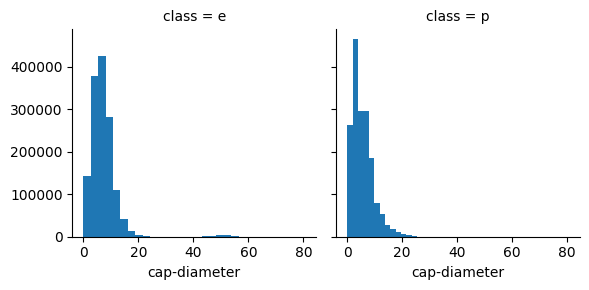

In [12]:
# cap-diameter
group = train_df[['cap-diameter', 'class']].groupby(['class'], as_index=False)
group.describe()


g = sns.FacetGrid(train_df, col='class')
g.map(plt.hist, 'cap-diameter', bins=30)


#Distribution is similar for both, but there is an outlier in class e that might throw the model during training

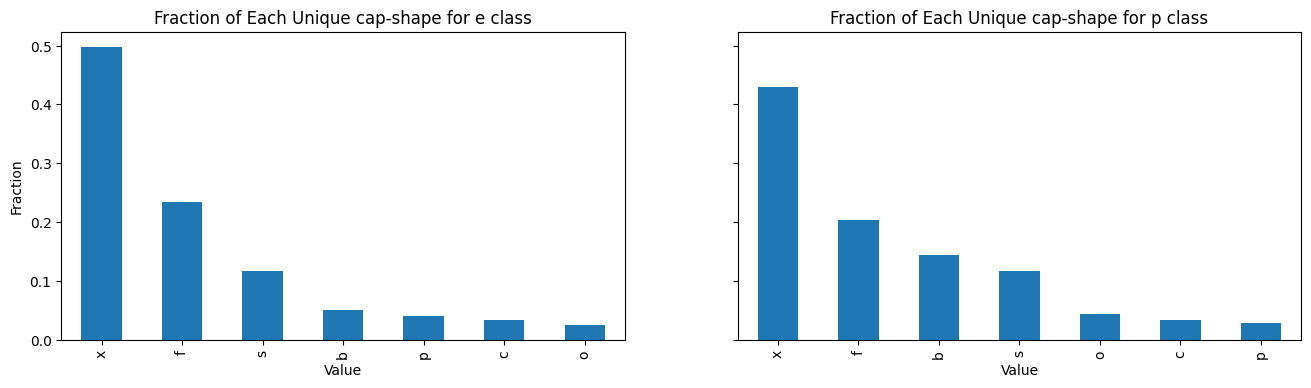

In [13]:
# cap-shape
group = train_df[['cap-shape', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['cap-shape'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['cap-shape'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique cap-shape for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique cap-shape for p class')
ax2.set_xlabel('Value')

plt.show()

## Cap Surface

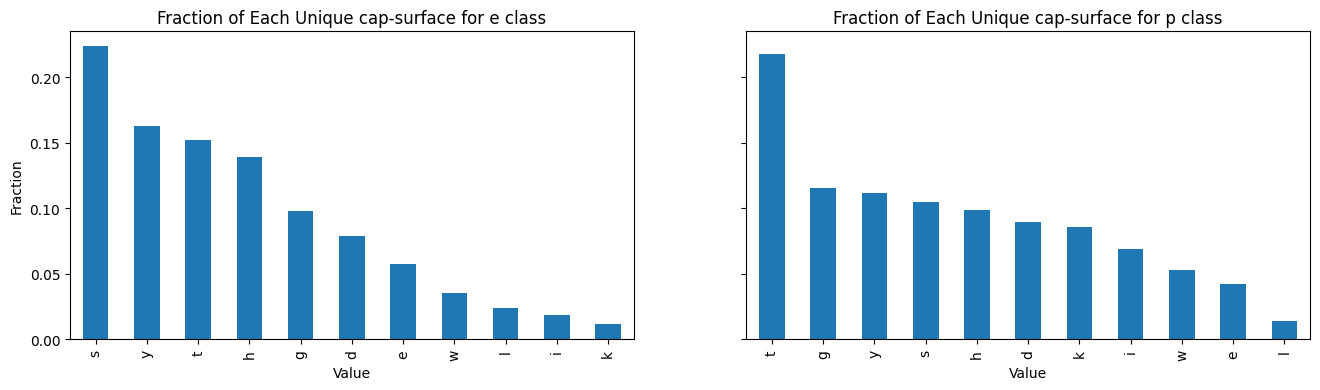

In [14]:
# cap-shape
group = train_df[['cap-surface', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['cap-surface'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['cap-surface'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique cap-surface for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique cap-surface for p class')
ax2.set_xlabel('Value')

plt.show()

## Cap Colour

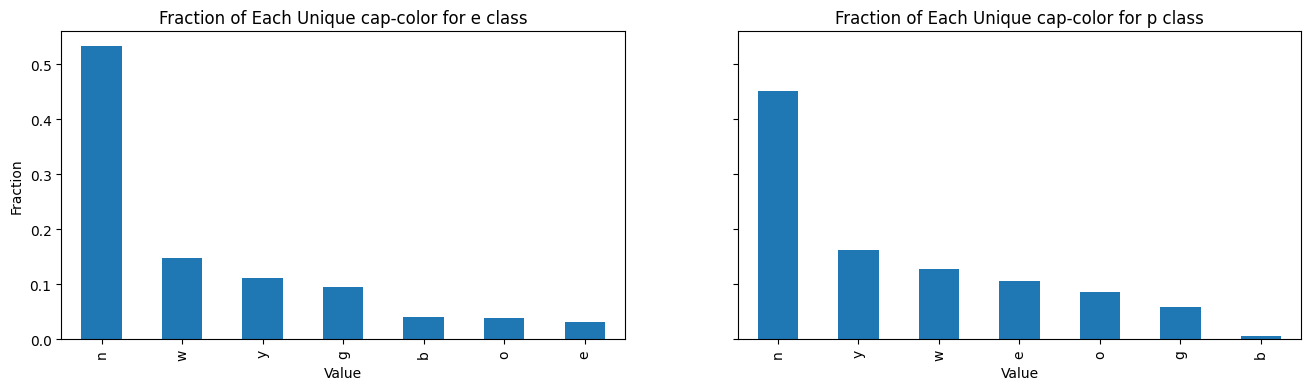

In [15]:
# cap-color
group = train_df[['cap-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['cap-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['cap-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique cap-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique cap-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Bruise or Bleed

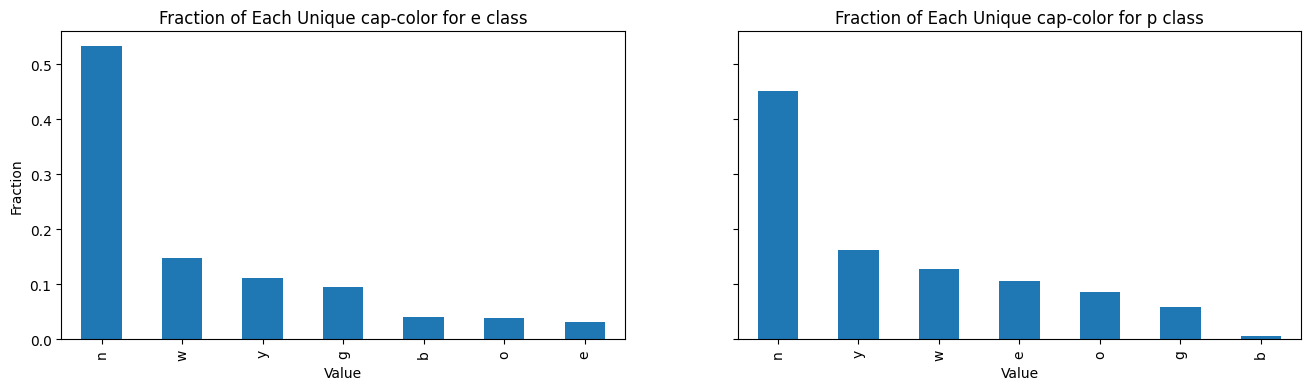

In [16]:
# cap-color
group = train_df[['cap-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['cap-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['cap-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique cap-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique cap-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Gill Attachement


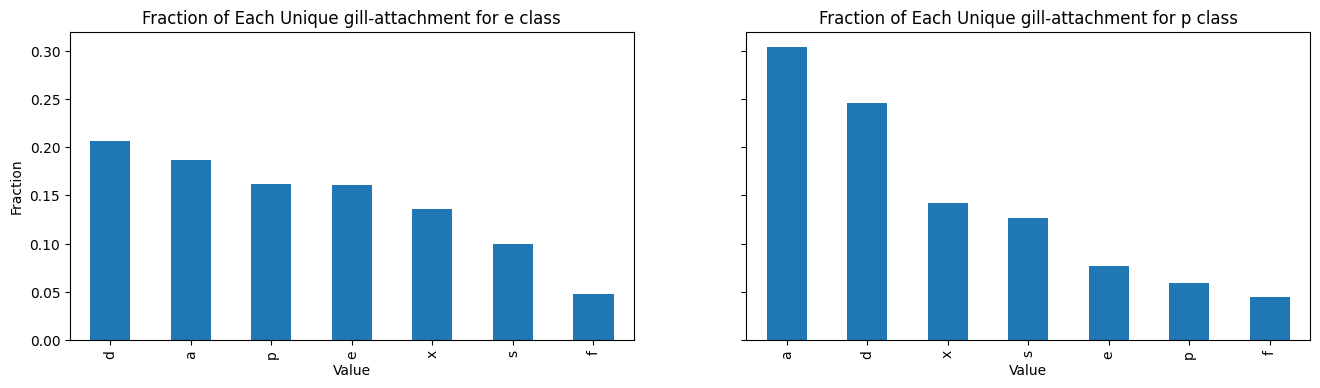

In [17]:
# Gill Attachement
group = train_df[['gill-attachment', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['gill-attachment'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['gill-attachment'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique gill-attachment for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique gill-attachment for p class')
ax2.set_xlabel('Value')

plt.show()

## Gill Spacing

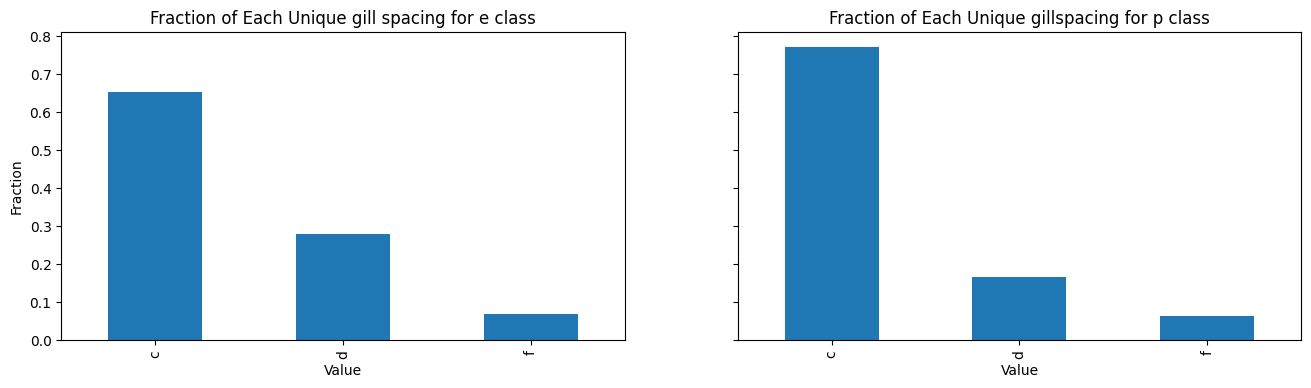

In [18]:
# Gill Spacing
group = train_df[['gill-spacing', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['gill-spacing'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['gill-spacing'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique gill spacing for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique gillspacing for p class')
ax2.set_xlabel('Value')

plt.show()

## Gill Color

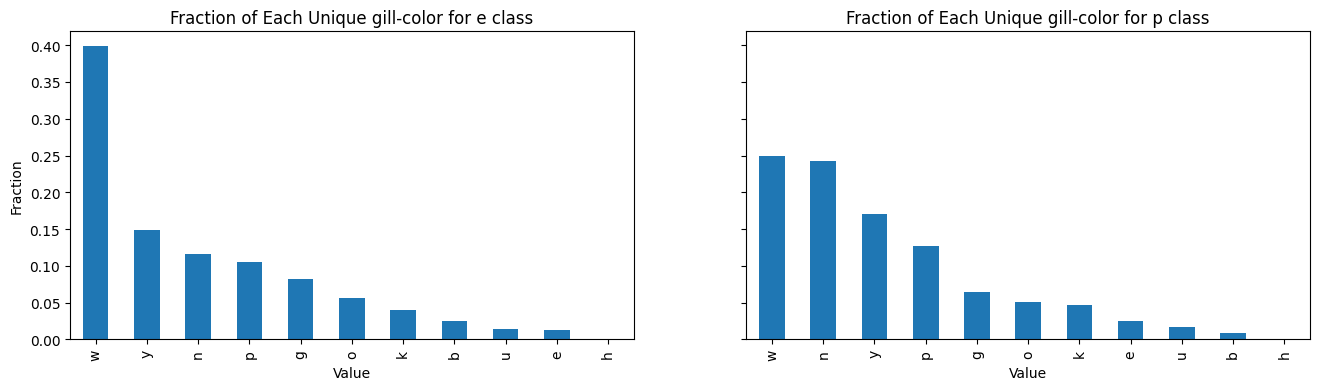

In [19]:
# Gill Spacing
group = train_df[['gill-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['gill-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['gill-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique gill-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique gill-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Stem Width

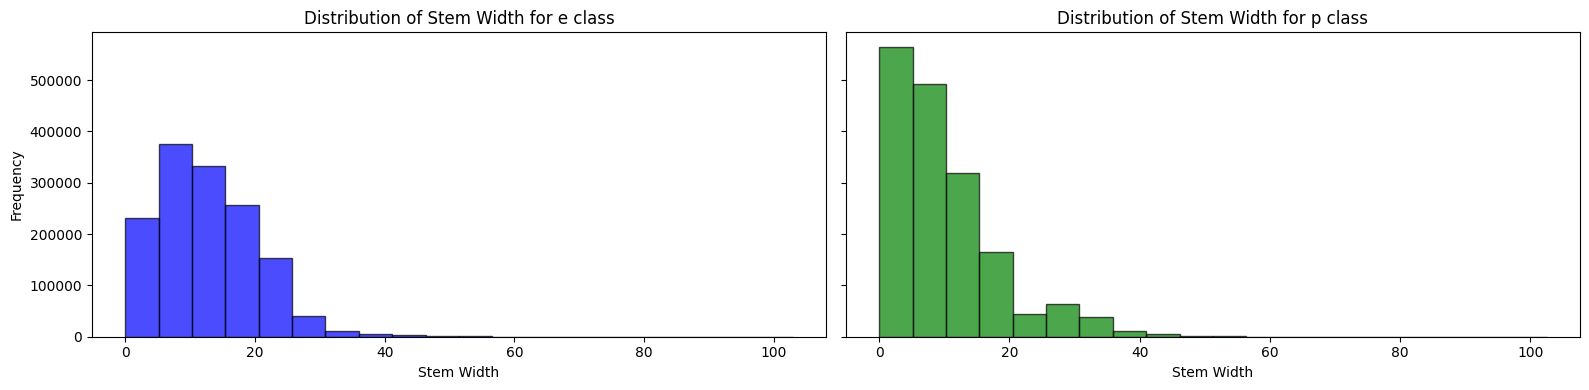

In [20]:
# Stem Width
group = train_df[['stem-width', 'class']].groupby(['class'], as_index=False)
group.describe()

stem_width_e = train_df['stem-width'].loc[train_df['class'] == 'e']
stem_width_p = train_df['stem-width'].loc[train_df['class'] == 'p']

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

ax1.hist(stem_width_e, bins=20, color='blue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Stem Width for e class')
ax1.set_xlabel('Stem Width')
ax1.set_ylabel('Frequency')

ax2.hist(stem_width_p, bins=20, color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Distribution of Stem Width for p class')
ax2.set_xlabel('Stem Width')

plt.tight_layout()
plt.show()

## Stem Root

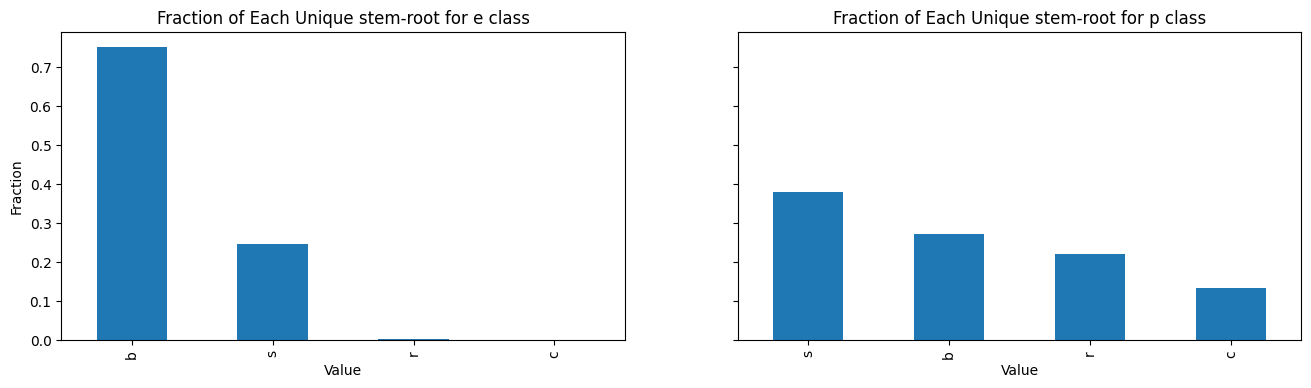

In [21]:
# Stem Root
group = train_df[['stem-root', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['stem-root'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['stem-root'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique stem-root for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique stem-root for p class')
ax2.set_xlabel('Value')

plt.show()

## Stem Surface

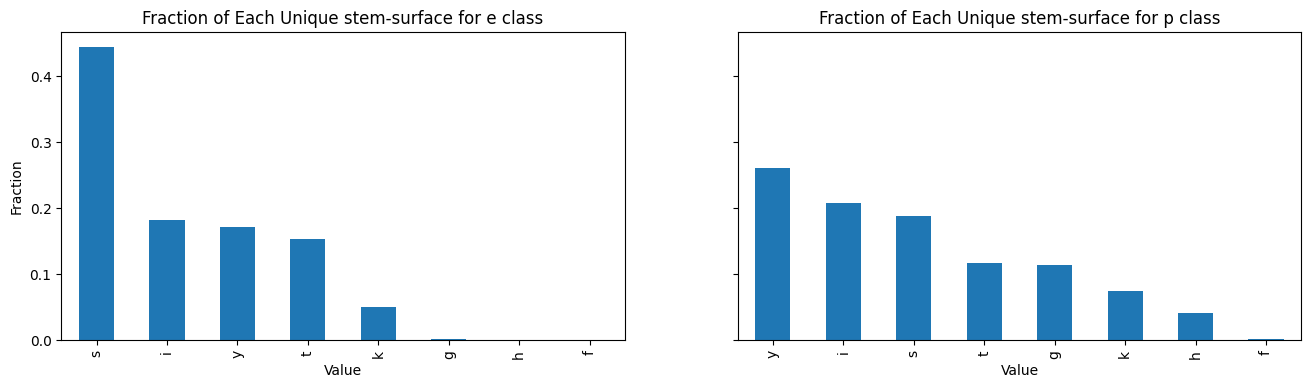

In [22]:
# Stem Surface
group = train_df[['stem-surface', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['stem-surface'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['stem-surface'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique stem-surface for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique stem-surface for p class')
ax2.set_xlabel('Value')

plt.show()

## Stem Color

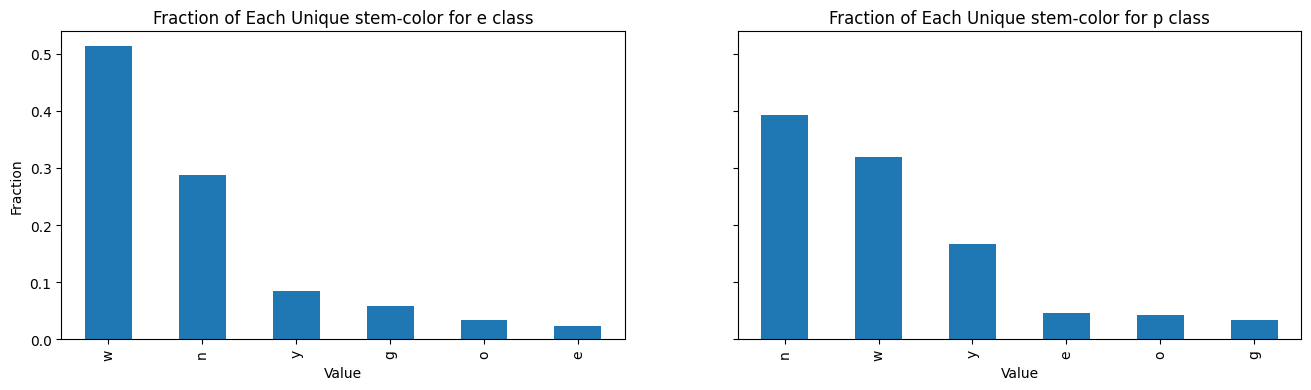

In [23]:
# Stem Color
group = train_df[['stem-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['stem-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['stem-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique stem-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique stem-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Veil Type

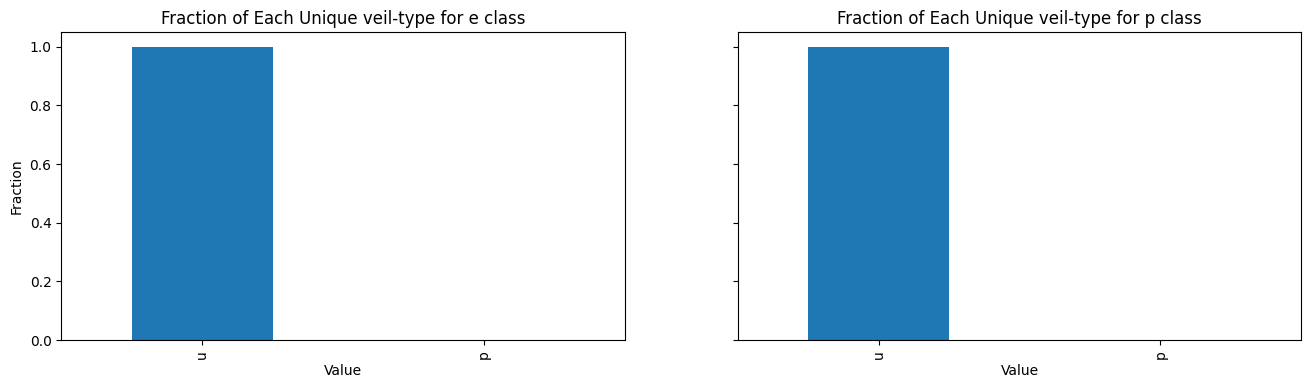

In [24]:
# Stem Color
group = train_df[['veil-type', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['veil-type'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['veil-type'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique veil-type for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique veil-type for p class')
ax2.set_xlabel('Value')

plt.show()

## Veil Color

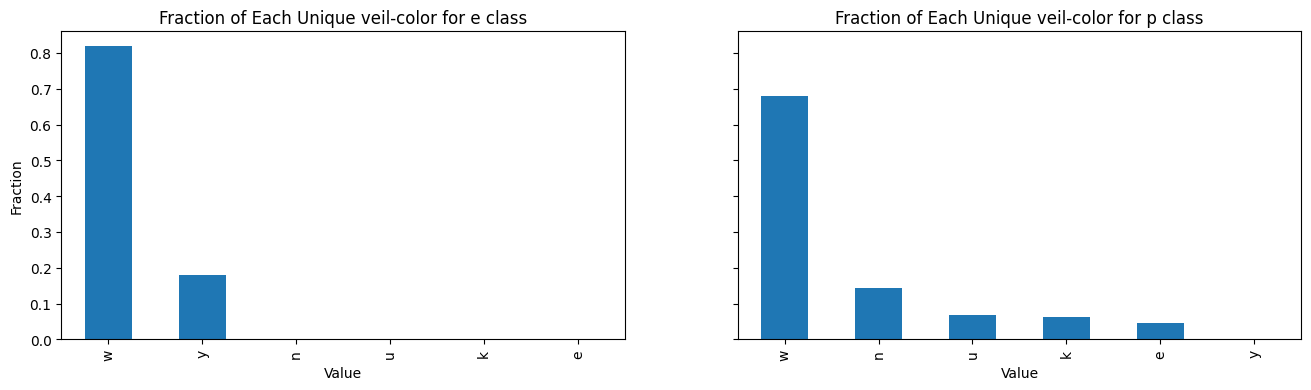

In [25]:
# Veil Color
group = train_df[['veil-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['veil-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['veil-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique veil-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique veil-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Has Ring

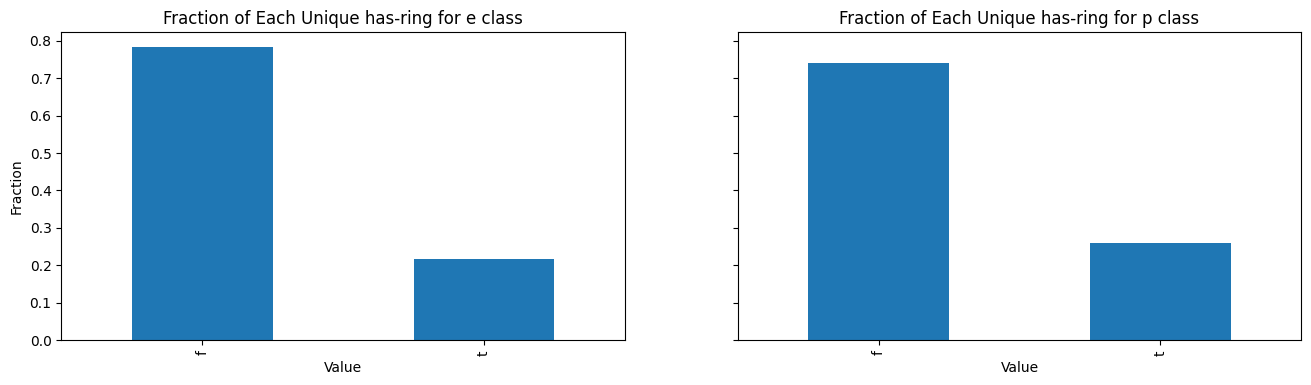

In [26]:
# Has Ring
group = train_df[['has-ring', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['has-ring'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['has-ring'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique has-ring for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique has-ring for p class')
ax2.set_xlabel('Value')

plt.show()

## Ring Type

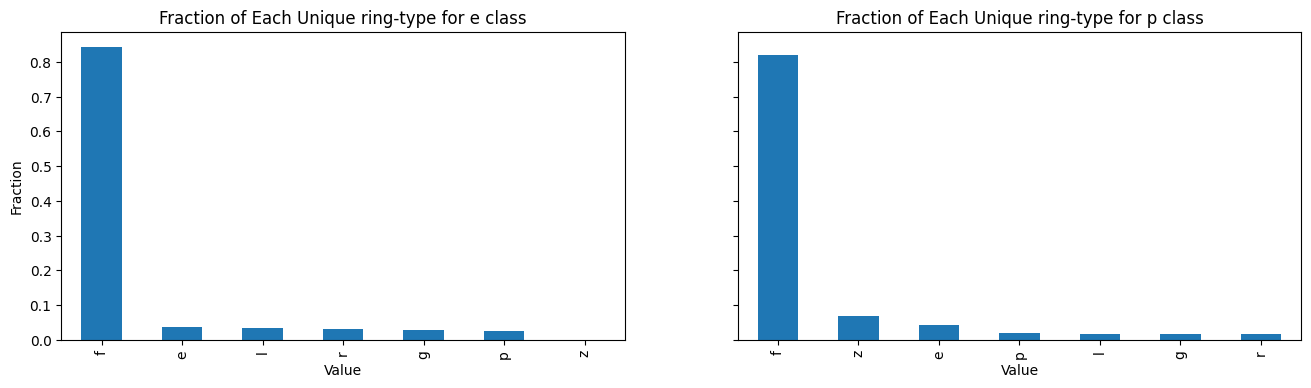

In [27]:
# Ring Type
group = train_df[['ring-type', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['ring-type'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['ring-type'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique ring-type for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique ring-type for p class')
ax2.set_xlabel('Value')

plt.show()

## Habitat

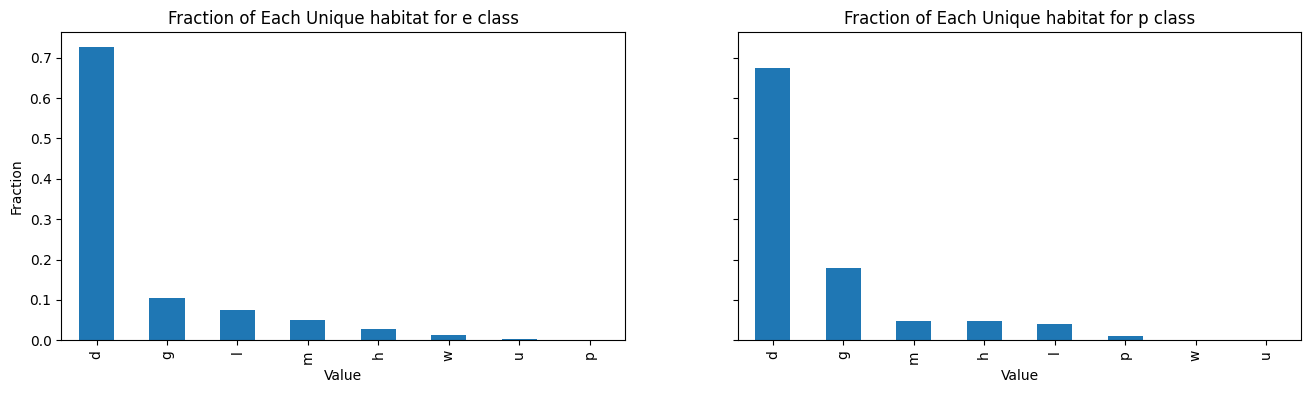

In [28]:
# Habitat
group = train_df[['habitat', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['habitat'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['habitat'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique habitat for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique habitat for p class')
ax2.set_xlabel('Value')

plt.show()

## Season

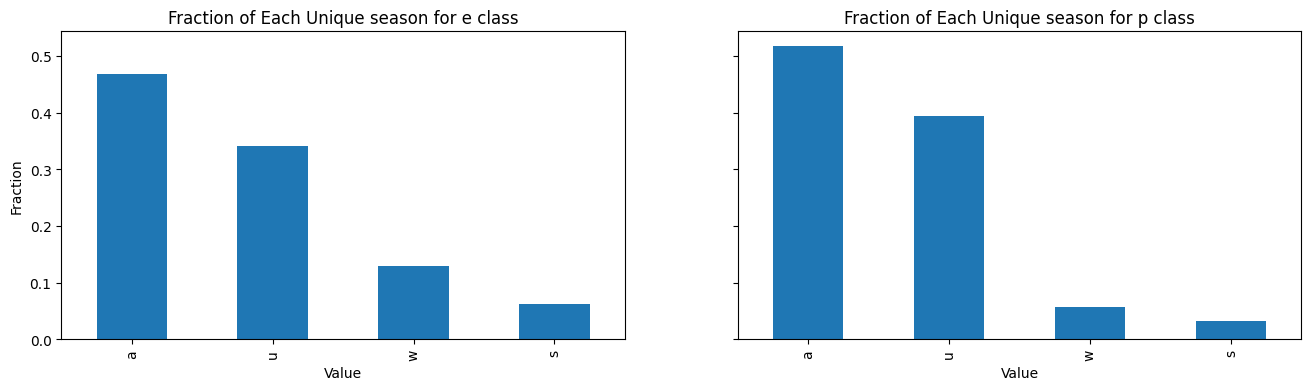

In [29]:
# Season
group = train_df[['season', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['season'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['season'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique season for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique season for p class')
ax2.set_xlabel('Value')

plt.show()

## Spore Print Color

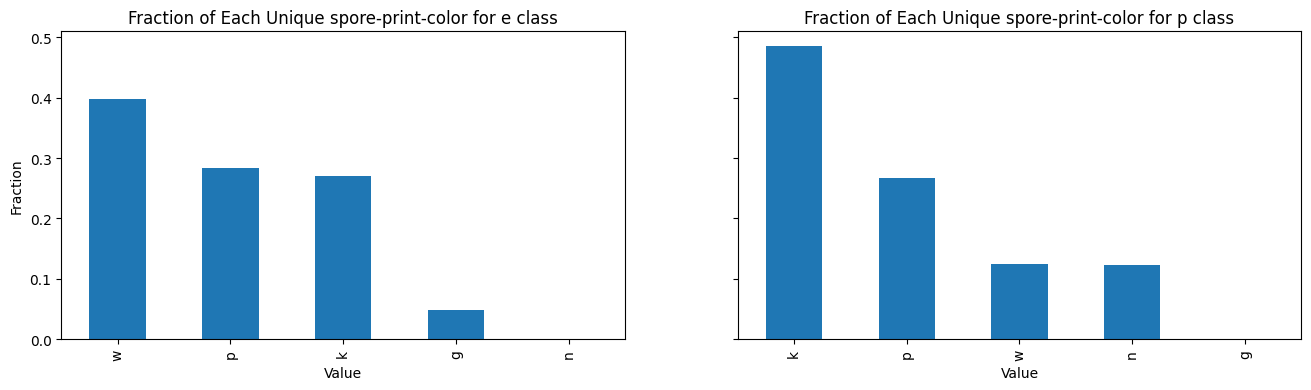

In [30]:
# Spore Print Color
group = train_df[['spore-print-color', 'class']].groupby(['class'], as_index=False)
group.describe()

value_counts_e = train_df['spore-print-color'].loc[train_df['class'] == 'e'].value_counts(normalize = True)

value_counts_p = train_df['spore-print-color'].loc[train_df['class'] == 'p'].value_counts(normalize = True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 4))

value_counts_e.plot(kind='bar', ax=ax1)  
ax1.set_title('Fraction of Each Unique spore-print-color for e class')
ax1.set_xlabel('Value')
ax1.set_ylabel('Fraction')

value_counts_p.plot(kind='bar', ax=ax2)  
ax2.set_title('Fraction of Each Unique spore-print-color for p class')
ax2.set_xlabel('Value')

plt.show()

## Checking correlations between features

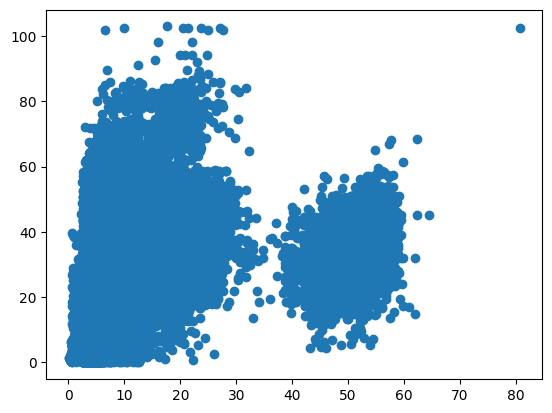

In [31]:
#Cap Diameter and Stem Width

plt.scatter(train_df['cap-diameter'],train_df['stem-width'] )
plt.show()

# Cleaning and Pre-Processing


In [32]:
#Fraction of null values in each column
Null_Value_Fraction = train_df.isnull().mean()
print(Null_Value_Fraction)
print('='*60)
print(Null_Value_Fraction[Null_Value_Fraction>0.6])
print('='*60)
print(Null_Value_Fraction[(Null_Value_Fraction<0.6) & (Null_Value_Fraction!=0)])

id                      0.000000
class                   0.000000
cap-diameter            0.000001
cap-shape               0.000182
cap-surface             0.215475
cap-color               0.110063
does-bruise-or-bleed    0.000038
gill-attachment         0.168254
gill-spacing            0.403786
gill-color              0.058699
stem-height             0.000000
stem-width              0.000000
stem-root               0.884778
stem-surface            0.635641
stem-color              0.062863
veil-type               0.948868
veil-color              0.879415
has-ring                0.000046
ring-type               0.042757
spore-print-color       0.919197
habitat                 0.000158
season                  0.000000
dtype: float64
stem-root            0.884778
stem-surface         0.635641
veil-type            0.948868
veil-color           0.879415
spore-print-color    0.919197
dtype: float64
cap-diameter            0.000001
cap-shape               0.000182
cap-surface             0.21

Let us now consider the information in front of us.

* There are 5 features with consisting of more than 60% of null values. We will drop these features from our analysis

* There are 16 features with less than 60% of null values. We perform data imputation on these features. For categorical data, most features appear to have a power law distribution. We should be able to impute missing values with the modal category without introducing much bias. For numerical categories, we will impute missing values with the median. This is bound to introduce some bias since the distribution of numerical features for edible and poisonous mushrooms appears to be different, but we will re-examine this later. 


## Import Relevant Libraries

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, f1_score
from sklearn import tree

## Prepare dataset for pre-processing

In [34]:
columns_to_drop = ["stem-root", 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']
train_df.drop(columns = columns_to_drop, inplace=True)
test_df.drop(columns = columns_to_drop, inplace=True)
for i in columns_to_drop:
    if i in categorical_columns: categorical_columns.remove(i)

## Run the transformations

In [35]:
# Generate the label and feature splits
X_train = train_df.drop(columns = ['class', 'id'])
y_train = train_df['class'].copy()

X_test = test_df

# Encode the label
le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

In [36]:
#Prepare the transformation pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('q_transformation', QuantileTransformer(output_distribution='normal'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fix: Corrected misplaced parenthesis
    ('one-hot-encode', OneHotEncoder())  # Fix: Added missing parentheses to initialize OneHotEncoder
])

# Combine numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, numerical_columns), 
    ('categorical', cat_pipeline, categorical_columns)
])

In [37]:
#Transform the training data
X_train_transformed = full_pipeline.fit_transform(X_train)

# Training

Now, we finally get to train a model of our choice. The original dataset provides baseline performance stats for a range of models. The lowest performance stat appears to be set using logistic regression which achieves a not-very low accuracy and precision above 99.8%. Let us see how close we can get to this figure.

## Setting up our model
This is a binary classification task. As a start, lets begin with logistic regression.

In [38]:
sgd_clf = SGDClassifier(random_state=42, loss="log_loss")

In [39]:
tree_clf = tree.DecisionTreeClassifier()

## Training the Model

Running the commented code below, yielded a F1 score of 0.98 and MCC of 0.96 for the Decision Tree model. The cross-validation process takes about an hour to run for both the SGD and Decision Tree classifier, therefore I have commented it out to speed up running the Notebook after submission. 

In [40]:
# SGD_y_train_predict = cross_val_predict(sgd_clf, X_train_transformed, y_train_transformed, cv = 5)

In [41]:
# decision_tree_y_train_predict = cross_val_predict(tree_clf, X_train_transformed, y_train_transformed, cv = 5)

# Evaluating the results

In [42]:
# SGD
# print("SGD MCC Score", matthews_corrcoef(y_train_transformed, SGD_y_train_predict))
# print("SGD ROC Score", roc_auc_score(y_train_transformed, SGD_y_train_predict))
# print("SGD F1 Score", f1_score(y_train_transformed, SGD_y_train_predict))

In [43]:
# Decision Tree
# print("Tree MCC Score", matthews_corrcoef(y_train_transformed, decision_tree_y_train_predict))
# print("Tree ROC Score", roc_auc_score(y_train_transformed, decision_tree_y_train_predict))
# print("Tree F1 Score", f1_score(y_train_transformed, decision_tree_y_train_predict))

# Submission

Having evaluated the models using cross-validation, the Decision Tree model appears to be the most promising. We shall fit the Decision Tree to our training data, and generate the results for submission.

In [44]:
tree_clf.fit(X_train_transformed, y_train_transformed)

DecisionTreeClassifier()

In [46]:
#Predict the targets based on test data
X_test_transformed = full_pipeline.transform(X_test)
decision_tree_y_test_predict = tree_clf.predict(X_test_transformed)
decision_tree_y_test_predict_inverse_transformed = le.inverse_transform(decision_tree_y_test_predict)

['e' 'p' 'p' ... 'p' 'e' 'e']


In [1]:
#Prepare the dataframe for submission
X_test['class'] = decision_tree_y_test_predict_inverse_transformed
submission_df = X_test[['id', 'class'], index = False]
submission_df.head()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3780034605.py, line 3)

In [52]:
submission_df.to_csv('submission.csv')

# Credits
This is my first Kaggle submission and it took me a while to understand the task and data. I would like to highlight the following notebooks that provided helpful information about how to approach the task. Although everything here is my own work, I initially referred to these notebooks to get my bearings.

* https://www.kaggle.com/code/ouaillaamiri02/0-97662-mushroom-classification-analysis
* https://www.kaggle.com/code/kparthiban007/mushroom-binary-classification#Data-Cleaning
* https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/comments#Workflow-stages